In [5]:
from vapory import *
from IPython.display import Image
import numpy as np
from IPython.display import *
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


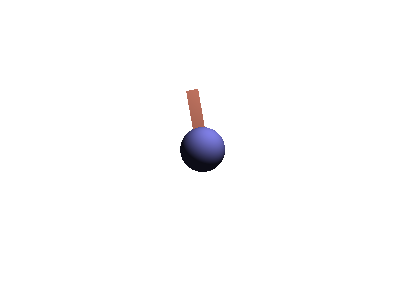

In [4]:
color = lambda col: Texture( Pigment( 'color', col))

def scene(t):
    """ Returns the scene at time 't' (in seconds) """
    x = np.sin(np.deg2rad(t))
    y = 1-np.cos(np.deg2rad(t))
    
    pendulum = Union(Box([-.2, 2, 0] , [.2,0,0],
                        color([1,.6,.5])),
                    Sphere( [0,0,0] , .75,  color([.5, .5, .9])),
                    'rotate', [0, 0, t],
                    'translate', [x/2, y, 0] )
    return Scene( Camera( 'location', [0, 1, -10], 'look_at',  [0, 0, 0] ),
            [ LightSource( [2, 4, -3], 'color', [1.5,1.5,1.5] ),
              Background( "color", [1,1,1] ),
              pendulum])
scene(10).render('ipython', width=400, height=300)

In [6]:
from moviepy.editor import VideoClip

def make_frame(t):
    return scene(40*t).render(width = 300, height=200, antialiasing=0.1)

#clip = VideoClip(make_frame, duration=4).write_gif("anim.gif", fps=12)

In [7]:
figsize(12, 12)

In [8]:
X0 = 0
F0 = [np.pi/40, 0]
XF = 10
g = 10.
l = 5.

In [9]:
def f(t, Ys):
    v, y = Ys
    return np.array([y, -v*np.sqrt(g/l)])

In [10]:
def F(y, F0 = F0):
    return -F0[0]*np.sin(y*np.power(g/l, 1/4))

In [11]:
def simple_euler(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        Ys[i+1] = Ys[i] + h*g(Xs[i], Ys[i])
    return Ys.T

In [12]:
def plot_results_for(M, with_n = [1e2]):
    _, plots = plt.subplots(len(with_n)+1, sharex=True)
    for plot, n in zip(plots[1:], with_n):
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs)[1]
        label = 'solution ' + str(h)
        plots[0].plot(Xs, S, label=label)
        plot.set_title(label)
        errs = np.absolute(S - TS)/TS
        plot.plot(Xs[1:], (errs[1:]))
    plots[0].plot(Xs, TS, label='original')
    plots[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.7)

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


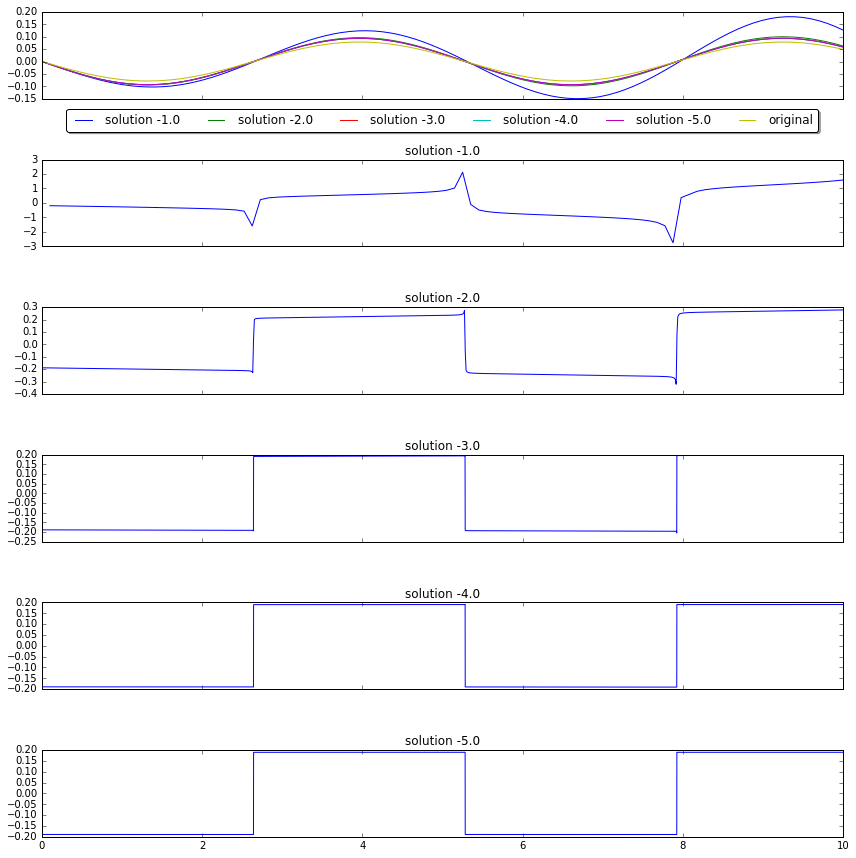

In [16]:
plot_results_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [13]:
def merson(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[i])
        k2 = h*g(Xs[i] + h/3., Ys[i] + k1/3.)
        k3 = h*g(Xs[i] + h/3., Ys[i] + (k1 + k2)/6.)
        k4 = h*g(Xs[i] + h/2., Ys[i] + (k1 + k3*3.)/8.)
        k5 = h*g(Xs[i+1], Ys[i] + (k1 - k3*3. + k4*4)/2.)
        Ys[i+1] = Ys[i] + k1/6. + k4*2./3. + k5/6.
    return Ys.T

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


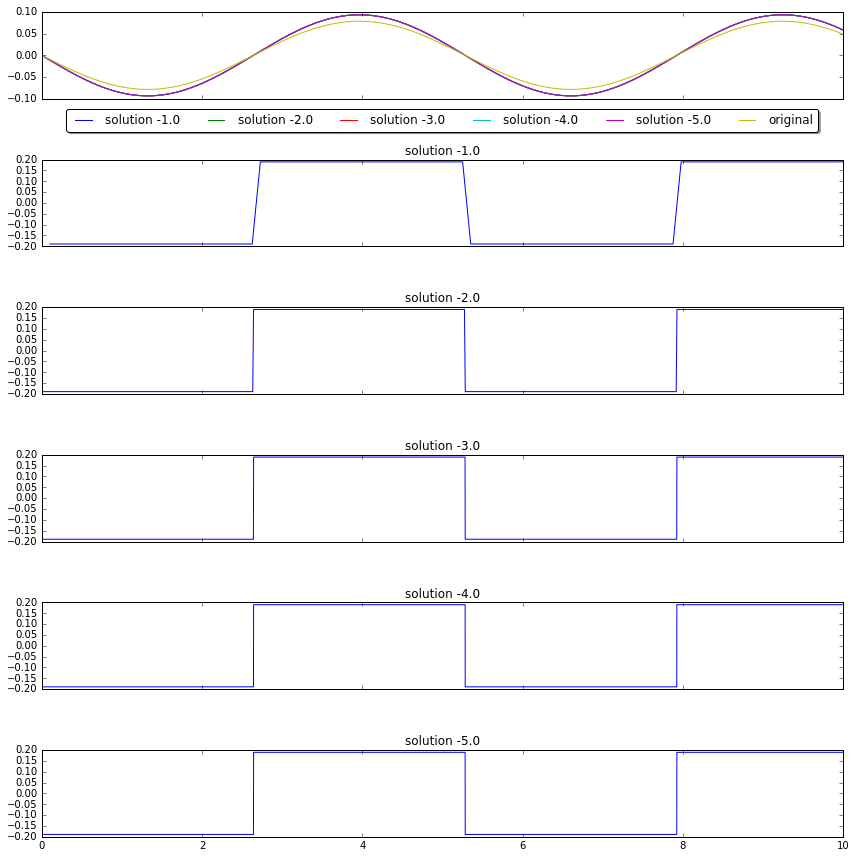

In [28]:
plot_results_for(merson, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [14]:
def middle_point(g = f, G = F, G0 = F0, Xs = np.linspace(X0, XF)):
    X0 = Xs[0]
    h = Xs[1] - X0
    N = len(Xs)
    Ys = np.zeros(Xs.shape + (2,))
    Ys[0] = G0
    for i in range(N-1):
        k1 = h*g(Xs[i], Ys[1])
        k2 = h*g((Xs[i] + Xs[i+1])/2., Ys[i] + k1/2.)
        Ys[i+1] = Ys[i] + k2
    return Ys.T

/usr/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in true_divide


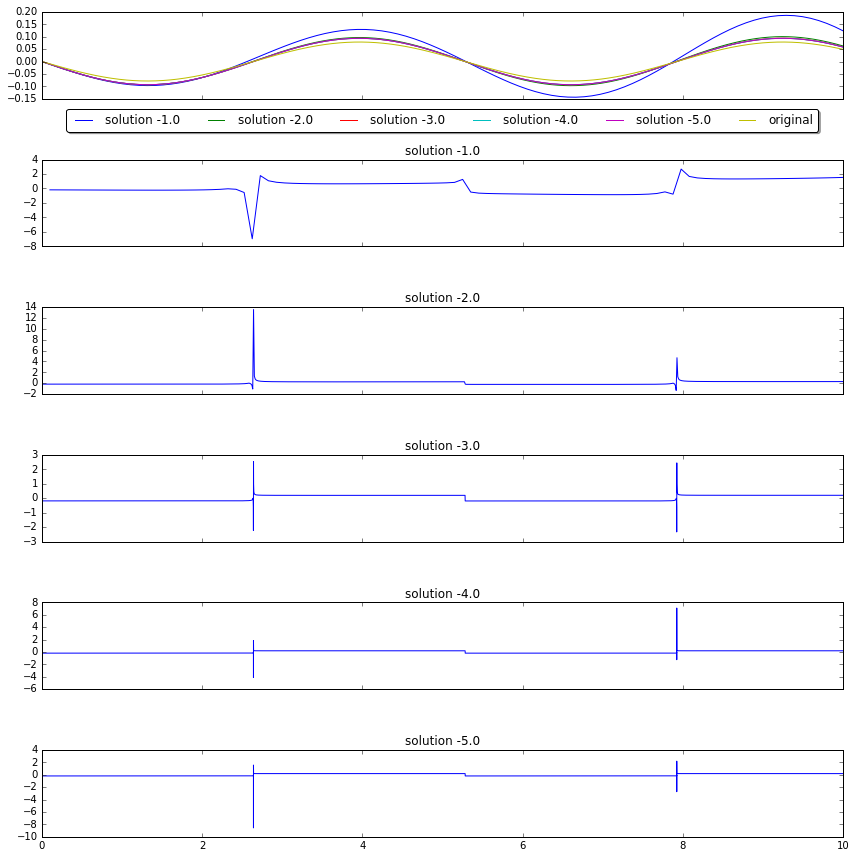

In [30]:
plot_results_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [15]:
def z(t, Ys):
    v, y = Ys
    return np.array([y, -np.sin(v)*np.sqrt(g/l)])

In [16]:
def plot_nlresults_for(M, with_n = [1e2]):
    for n in with_n:
        Xs = np.linspace(X0, XF, n)
        h = round(np.log10(abs(Xs[1] - Xs[0])), 2)
        TS = F(Xs)
        S = M(Xs = Xs, g = z)[1]
        label = 'solution ' + str(h)
        plt.plot(Xs, S, label=label)
    plt.plot(Xs, TS, label='original')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=6)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.7)

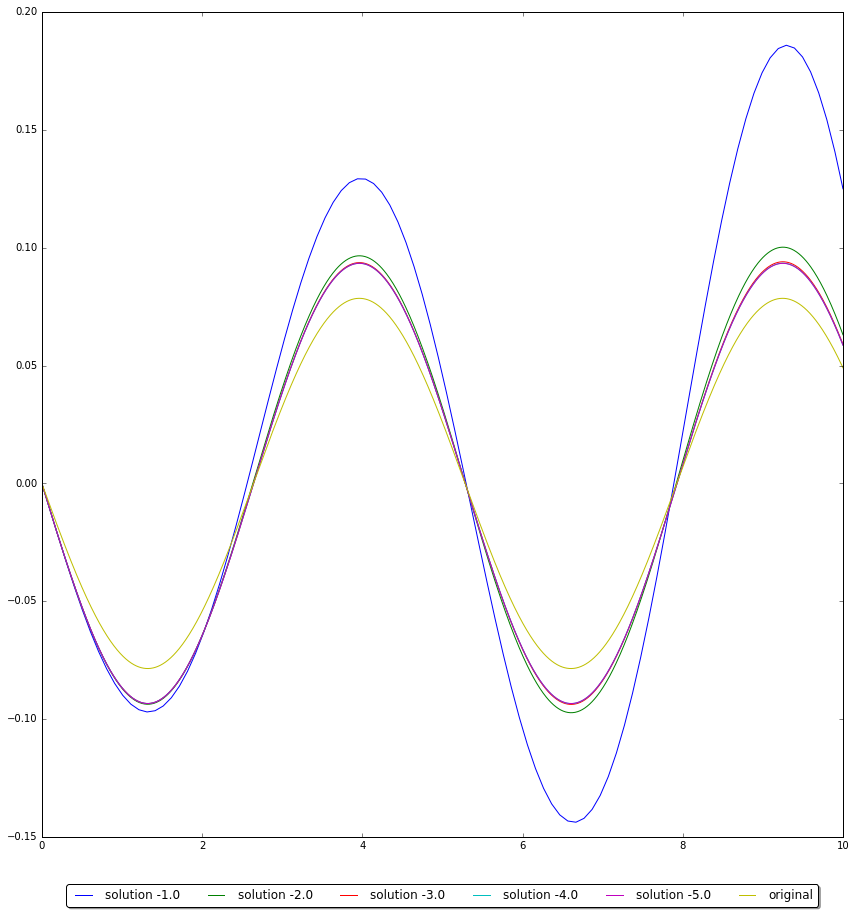

In [35]:
plot_nlresults_for(middle_point, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

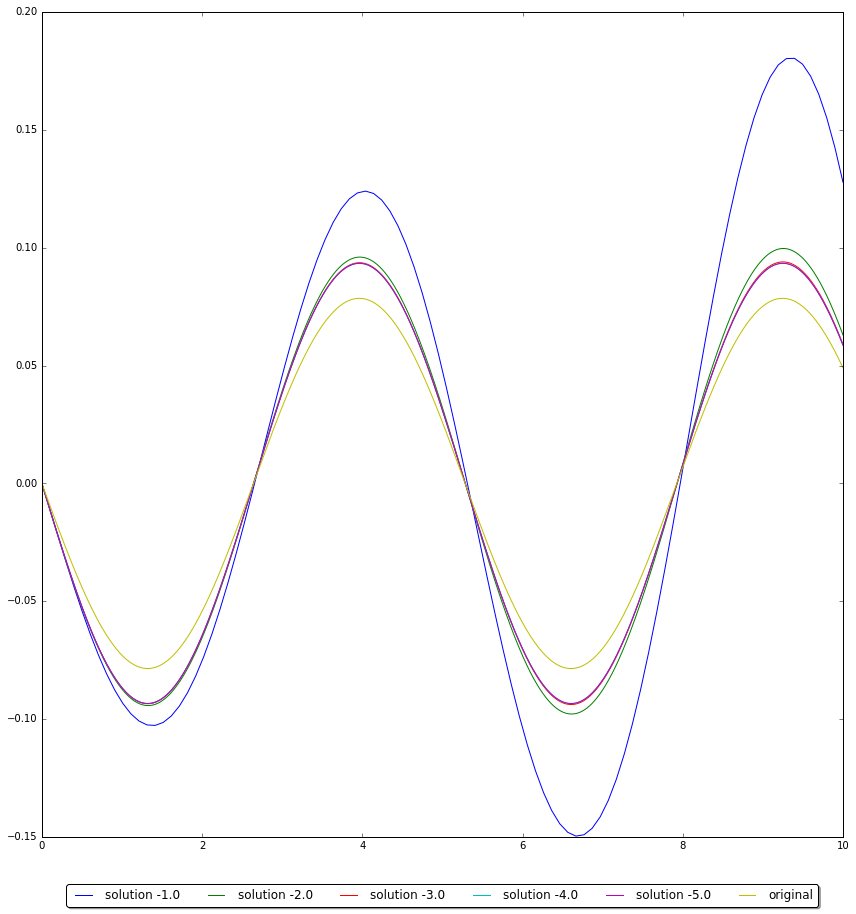

In [36]:
plot_nlresults_for(simple_euler, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

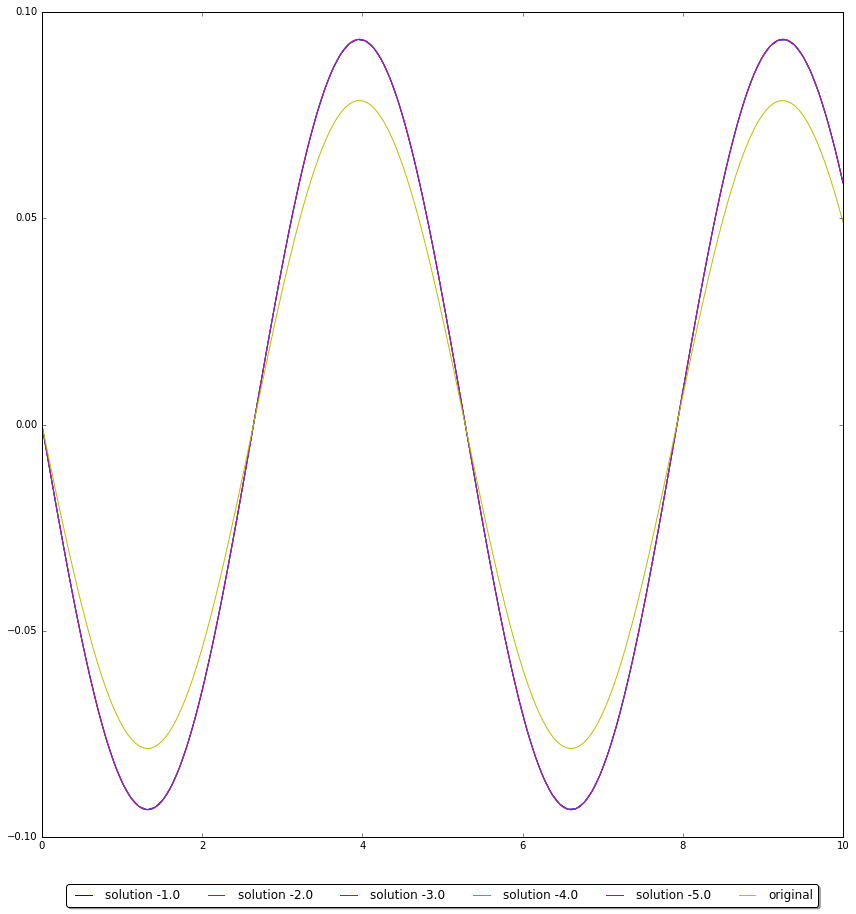

In [37]:
plot_nlresults_for(merson, with_n = [1e2, 1e3, 1e4, 1e5, 1e6])

In [19]:
Xs = np.linspace(X0, 10, 1e4)
S = merson(Xs = Xs, g = z, G0 = F0)[1]

In [60]:
def make_frame(t):
    return scene(100*S[int(10*t)]).render(width = 400, height = 300, antialiasing=0.1)

clip = VideoClip(make_frame, duration=10).write_gif("anim.gif", fps=10)


[MoviePy] Building file anim.gif with imageio


In [48]:
S

array([ 0.        , -0.01118102, -0.02220138, -0.0329027 , -0.04313109,
       -0.05273939, -0.06158919, -0.0695529 , -0.0765156 , -0.08237666,
       -0.08705134, -0.09047194, -0.09258893, -0.0933716 , -0.09280863,
       -0.09090816, -0.08769774, -0.0832239 , -0.0775514 , -0.07076231,
       -0.06295472, -0.05424135, -0.04474784, -0.03461095, -0.02397656,
       -0.01299761, -0.00183191,  0.00936012,  0.02041766,  0.0311818 ,
        0.04149776,  0.05121714,  0.06019995,  0.06831672,  0.07545032,
        0.08149769,  0.08637138,  0.09000086,  0.09233353,  0.09333561,
        0.09299255,  0.09130933,  0.08831036,  0.08403908,  0.07855734,
        0.07194446,  0.06429602,  0.05572244,  0.04634737,  0.03630589,
        0.02574253,  0.01480921,  0.00366311, -0.00753563, -0.01862609,
       -0.02944891, -0.03984848, -0.04967519, -0.05878755, -0.06705424,
       -0.07435598, -0.08058732, -0.08565815, -0.08949508, -0.09204255,
       -0.09326363, -0.09314062, -0.09167531, -0.08888893, -0.08

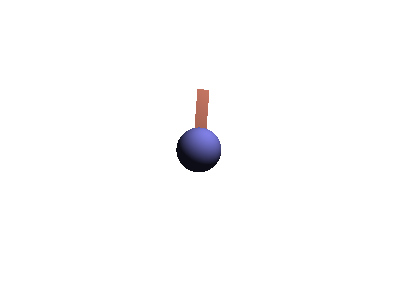

In [57]:
scene(100*S[4]).render('ipython', width=400, height=300)

In [71]:
m = 2
c = 2
def w(t, Ys):
    v, y = Ys
    p = -1*m/(l*l)
    return np.array([y, p * (np.sin(v)*m*g*l + c*l*y)])

In [72]:
S1 = merson(Xs = Xs, g = w, G0 = F0)[1]

In [74]:
S1*100

array([  0.        ,  -6.00842841, -11.08378039, -14.90379089,
       -17.26817013, -18.10508554, -17.46729207, -15.51868258,
       -12.51289665,  -8.7663528 ,  -4.62845248,  -0.45168281,
         3.43599607,   6.75459449,   9.29000756,  10.90553143,
        11.54658301,  11.23870861,  10.07946828,   8.22525705,
         5.87449784,   3.24885104,   0.5741092 ,  -1.93769325,
        -4.1036763 ,  -5.782048  ,  -6.87994232,  -7.35687205,
        -7.22385023,  -6.53856112,  -5.3972497 ,  -3.92421858,
        -2.25994946,  -0.54889501,   1.07207688,   2.48374136,
         3.5924199 ,   4.33528785,   4.68287626,   4.63878634,
         4.23684931,   3.53614684,   2.61444638,   1.56068891,
         0.46719147,  -0.5778043 ,  -1.49668511,  -2.22768211,
        -2.72845004,  -2.97785809,  -2.97599103,  -2.74249773,
        -2.31354291,  -1.73770777,  -1.0712413 ,  -0.37308344,
         0.29993419,   0.89734989,   1.3785065 ,   1.71495628,
         1.89172878,   1.90745112,   1.77339994,   1.51

In [75]:
def make_frame(t):
    return scene(100*S[int(10*t)]).render(width = 400, height = 300, antialiasing=0.1)

clip = VideoClip(make_frame, duration=10).write_gif("anim.gif", fps=10)


[MoviePy] Building file anim.gif with imageio
